In [126]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


In [127]:
print("Number of datasetes: ", len(tfds.list_builders()))
#tfds.list_builders()

Number of datasetes:  1003


In [128]:
def load():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    print("x_train shape :", x_train.shape)
    print("x_test shape :", x_test.shape)
    print("y_train shape :", y_train.shape)
    print("y_test shape :", y_test.shape)
    #plt.imshow(x_train[11])
    return x_train, y_train, x_test, y_test

In [129]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def normalize(data):
  data = data.astype("float32")
  data = data/255.0
  return data

#x_val = normalize(x_val)
#datagen.fit(x_val)

def Norm_Train_test(train, test):    
  x_train = normalize(train)
  x_test = normalize(test)
  return x_train, x_test
  
#y_val = tf.keras.utils.to_categorical(y_val, 10)
#plt.imshow(x_train[7])
#plt.figure(figsize=(16,12))
#for i in range(40):
#  ax = plt.subplot(5,8,i+1)
#  plt.imshow(x_train[i])
#plt.figure(figsize=(16,12))
#n = 0
#for i in datagen.flow(x_train):
#  if n+1 <= 40:
#    ax = plt.subplot(5,8,n+1)
#    plt.imshow(i[0])
#    n+=1
#  else:
#    break


  



In [130]:
def results(model, epoch = 5,b =32, show = False):
    epoch = epoch
    x_train, y_train, x_test, y_test = load()
    x_train, x_test = Norm_Train_test(x_train, x_test)
    datagen = ImageDataGenerator(
        rotation_range = 15, 
        width_shift_range = 0.1, 
        height_shift_range = 0.1, 
        horizontal_flip=True, 
        validation_split = 0.2
        )
    r = model.fit(datagen.flow(x_train,y_train, batch_size = b, subset = "training"),validation_data = datagen.flow(x_train,y_train, batch_size = 8, subset = "validation"), epochs = epoch, verbose = 1)
    acc = model.evaluate(x_test, y_test)
    print("test set lose : ",acc[0])
    print("test set accuracy : ", acc[1]*100  )
    epoch_range = range(1, epoch+1)
    if show:
        # Plot training and validation accuracy
        plt.plot(epoch_range, r.history['accuracy'])
        plt.plot(epoch_range, r.history['val_accuracy'])
        plt.title('Classification Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='lower right')
        plt.show()
        # Plot training & validation loss values
        plt.plot(epoch_range,r.history['loss'])
        plt.plot(epoch_range, r.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='lower right')
        plt.show()

In [131]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
f = unpickle("/Users/fx7707/.keras/datasets/cifar-100-python/meta")
c = f[b"fine_label_names"]
classes = []
for i in c:
    classes.append(i.decode('UTF-8'))

#print(classes)
print(len(classes))
classes  = ['airplane','automobile', 'bird', 'cat','deer','dog','frog', 'horse','ship','truck']
def predict_class(filename, model):
    img = load_img(filename, target_size = (32,32))
    plt.show(img)
    save = img
    img = img_to_array(img)
    img = img.reshape(1,32,32,3)
    img = img.astype('float32')
    img = img/255.0
    result = model.predict(img)
    dict2 = {}
    for i in range(10):
        dict2[result[0][i]] = classes[i]
    res = result[0]
    res.sort()
    res = res[::-1]
    results = res[:3]
    print("Top predictions of these images are")
    for i in range(3):
        print("{} : {}".format(dict2[results[i]],
            (results[i]*100).round(2)))
    print('The image given as input is')
    plt.imshow(save)
    

100


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_70 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_71 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_71 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

2022-02-03 02:13:12.785169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


624/625 [============================>.] - ETA: 0s - loss: 2.0844 - accuracy: 0.2492

2022-02-03 02:13:34.158201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 31s 47ms/step - loss: 2.0841 - accuracy: 0.2492 - val_loss: 1.7359 - val_accuracy: 0.3652
Epoch 2/50
625/625 [==============================] - 28s 45ms/step - loss: 1.7084 - accuracy: 0.3624 - val_loss: 1.6043 - val_accuracy: 0.3960
Epoch 3/50
625/625 [==============================] - 29s 46ms/step - loss: 1.5696 - accuracy: 0.4166 - val_loss: 1.7307 - val_accuracy: 0.3827
Epoch 4/50
625/625 [==============================] - 28s 45ms/step - loss: 1.4733 - accuracy: 0.4586 - val_loss: 1.4125 - val_accuracy: 0.4811
Epoch 5/50
625/625 [==============================] - 28s 45ms/step - loss: 1.3920 - accuracy: 0.4895 - val_loss: 1.4262 - val_accuracy: 0.4780
Epoch 6/50
625/625 [==============================] - 29s 47ms/step - loss: 1.3265 - accuracy: 0.5157 - val_loss: 1.1861 - val_accuracy: 0.5692
Epoch 7/50
625/625 [==============================] - 29s 46ms/step - loss: 1.2688 - accuracy: 0.5402 - val_loss: 1.2514 - val_accuracy: 0.5387
Epo

2022-02-03 03:18:43.726256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 11ms/step - loss: 0.6666 - accuracy: 0.7720
test set lose :  0.6666156053543091
test set accuracy :  77.20000147819519


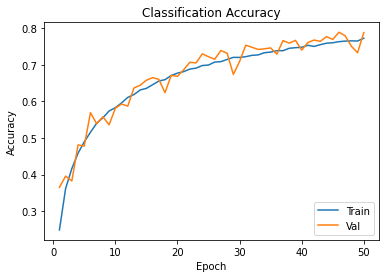

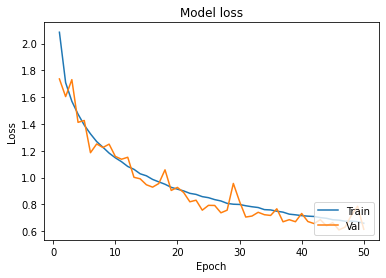

In [132]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.utils import plot_model
weight_decay = 1e-6
with tf.device("/GPU:0"):
    model_1 = Sequential()
    model_1.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay),input_shape = (32, 32, 3)))
    model_1.add(BatchNormalization())
    model_1.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay)))
    model_1.add(BatchNormalization())
    model_1.add(MaxPooling2D((2, 2)))
    model_1.add(Dropout(0.2))
    model_1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay)))
    model_1.add(BatchNormalization())
    model_1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay)))
    model_1.add(BatchNormalization())
    model_1.add(MaxPooling2D((2, 2)))
    model_1.add(Dropout(0.3))
    model_1.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay)))
    model_1.add(BatchNormalization())
    model_1.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay)))
    model_1.add(BatchNormalization())
    model_1.add(MaxPooling2D((2, 2)))
    model_1.add(Dropout(0.4))
    model_1.add(Flatten())
    model_1.add(Dense(128, activation = 'relu'))
    model_1.add(Dropout(0.5))
    model_1.add(Dense(10, activation = 'softmax'))
    #plot_model(model_1, to_file="model1.png")
    print(model_1.summary())
    b = 64
    opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9) 
    model_1.compile(optimizer=opt, loss = 'categorical_crossentropy',metrics = ['accuracy'])
    results(model_1,50,b,True)
    


2022-02-03 03:18:48.209813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Top predictions of these images are
airplane : 90.57
deer : 4.96
ship : 1.33
The image given as input is


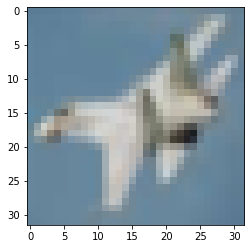

Top predictions of these images are
bird : 97.3
dog : 1.1
horse : 0.68
The image given as input is


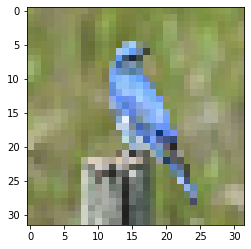

Top predictions of these images are
airplane : 25.12
frog : 19.31
automobile : 14.57
The image given as input is


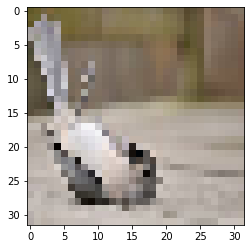

In [133]:
model_1.save("NEW_CIFAR10.h5")
predict_class("file01.jpg", model_1)
predict_class("bird.jpg", model_1)
predict_class("bird2.jpg", model_1)